In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('Housing.csv')
train_data, test_data = train_test_split(data, test_size=0.2)

print(train_data.shape)
print(test_data.shape)


(436, 13)
(109, 13)


In [3]:
# to visualize the data
print(train_data)

       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
309  4130000  4632         4          1        2      yes        no       no   
175  5250000  9800         4          2        2      yes       yes       no   
482  2940000  3150         3          1        2       no        no       no   
27   8400000  8875         3          1        1      yes        no       no   
68   6860000  6000         3          1        1      yes        no       no   
..       ...   ...       ...        ...      ...      ...       ...      ...   
348  3815000  3150         2          2        1       no        no      yes   
252  4515000  9860         3          1        1      yes        no       no   
371  3640000  3570         3          1        2      yes        no      yes   
181  5215000  7200         3          1        2      yes       yes      yes   
139  5740000  6360         3          1        1      yes       yes      yes   

    hotwaterheating airconditioning  pa

In [4]:
#x_train is the input variable, a vector of the input variables area in sq ft, bedrooms, bathrooms, etc.
#y_train is the output variable, the price of the house in $1000 

train_data = pd.DataFrame(train_data).to_numpy()
test_data = pd.DataFrame(test_data).to_numpy()


x_train = np.column_stack((train_data[:,1], train_data[:,2], train_data[:,3], train_data[:,4], train_data[:,7], train_data[:,10]))
y_train = train_data[:, 0]


x_test = np.column_stack((test_data[:,1], test_data[:,2], test_data[:,3], test_data[:,4], test_data[:,7], test_data[:,10]))
y_test = test_data[:, 0]

print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)

[[4632 4 1 2 'no' 0]
 [9800 4 2 2 'no' 2]
 [3150 3 1 2 'no' 0]
 ...
 [3570 3 1 2 'yes' 0]
 [7200 3 1 2 'yes' 1]
 [6360 3 1 1 'yes' 2]]
[4130000 5250000 2940000 8400000 6860000 3710000 5600000 10150000 3885000
 4900000 6650000 5600000 2940000 3500000 5652500 6510000 3430000 4473000
 5425000 2870000 4319000 4865000 2695000 1750000 4095000 5229000 4340000
 4270000 9870000 5040000 3640000 4235000 4200000 3500000 3780000 3430000
 3836000 3675000 6440000 4270000 5250000 4200000 3465000 4690000 3675000
 3780000 2450000 3045000 2450000 5866000 4550000 6720000 8400000 1855000
 5250000 2940000 6930000 2852500 5530000 4767000 3150000 8645000 2380000
 3703000 6020000 4095000 6615000 6125000 5040000 4620000 5110000 1750000
 3850000 4480000 2450000 4200000 4760000 2870000 8400000 2590000 6650000
 3360000 4550000 5810000 5565000 9310000 5600000 6650000 3773000 3087000
 3920000 4690000 2380000 4060000 6650000 4410000 5460000 7210000 6650000
 4473000 6930000 3255000 6895000 4200000 2660000 4585000 5873

In [5]:
#Using one hot encoding to change categorical data into numerical data

for i in range (x_train.shape[0]):
    for j in range(x_train.shape[1]):
        if x_train[i][j] == 'yes':
            x_train[i][j] = 1
        elif x_train[i][j] == 'no':
            x_train[i][j] = 0
            
for i in range (x_test.shape[0]):
    for j in range(x_test.shape[1]):
        if x_test[i][j] == 'yes':
            x_test[i][j] = 1
        elif x_test[i][j] == 'no':
            x_test[i][j] = 0

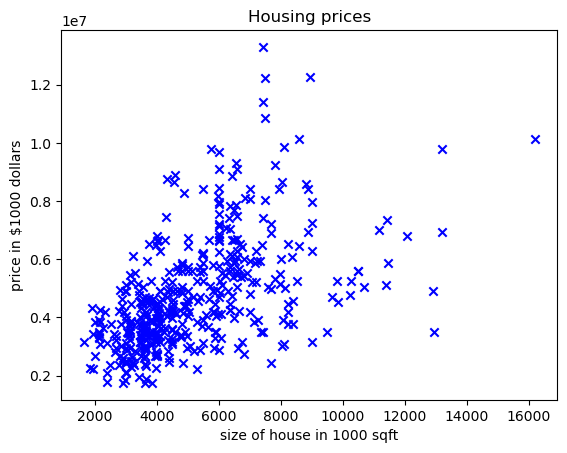

In [6]:
#how to plot data as a scatterplot with matplotlib for one variable
plt.scatter(x_train[:,0], y_train, marker = "x", c = "b")
#setting the title
plt.title("Housing prices")
plt.ylabel("price in $1000 dollars")
plt.xlabel("size of house in 1000 sqft")
plt.show()

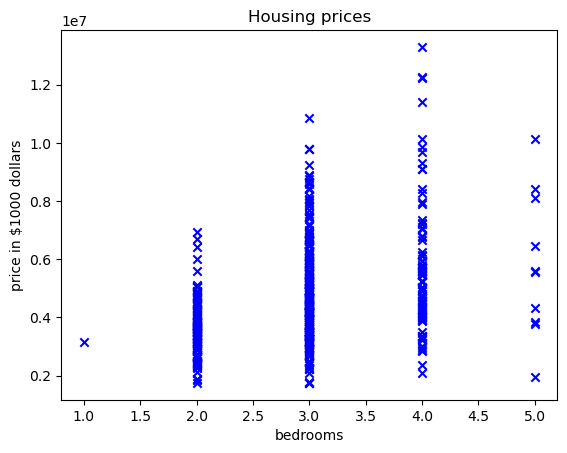

In [7]:
plt.scatter(x_train[:,1], y_train, marker = "x", c = "b")
#setting the title
plt.title("Housing prices")
plt.ylabel("price in $1000 dollars")
plt.xlabel("bedrooms")
plt.show()

In [8]:
# normalizing the data for both training and test set to make gradient descent more efficient

for j in range(x_train.shape[1]):
    x_train[:,j] = (x_train[:,j] - np.mean(x_train[:,j])) / np.std(x_train[:,j])
    x_test[:,j] = (x_test[:,j] - np.mean(x_test[:,j])) / np.std(x_test[:,j])

Task: Use Gradient Descent to create a linear regression to most accurately predict housing prices based on some training examples. This is set as the baseline model

In [9]:
def function(x, w, b):
    '''
    Computes the prediction of a linear model
    Args:
    x (ndarray (n, )): an example house with n features
    w (ndarray (n, )): weights for each of the n features
    b (scalar)    : bias
    Returns
      f_wb (scalar): model prediction
    '''
    f_wb = np.dot(w, x) + b
    
    return f_wb

In [10]:
#The cost function

def compute_cost(x,y,w,b):
    '''
    computes cost function for linear regression
    Args:
      x (ndarray (m,n)): Data, m examples, n factors for each example
      y (ndarray (m,)): target values
      w (ndarray (n, )): weights for each of the n variables
      b (scalar)    : bias
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    '''
    
    m = x.shape[0] #number of training examples 
    
    total_cost = 0
    
    for i in range(m):
        f_wb_i = function(x[i], w, b)              #model prediction
        total_cost += (f_wb_i - y[i])**2    #mean-squared error
        
    total_cost = total_cost*(1/(m))     #divide by 2m to get the average
    
    return total_cost

In [11]:
#gradient function, it calculates derivative of the cost

def compute_gradient(x, y, w, b):

    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m, n)): Data, m examples 
      y (ndarray (m, )): target values
      w (ndarray (n, )): weights for each of the n variables
      b (scalar)    : bias
    Returns
      dj_dw (ndarray (n, )): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    """
    A formula for the value of the gradient is found by using chain rule, we counterintuitively divided by 2
    in cost formula to account for the exponent multiplying in the gradient calculation.
    """
    
    m = x.shape[0]
    n = x.shape[1]
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range (m):
        f_wb_i = function(x[i], w, b) 
        
        for j in range (n):
            dj_dw[j] += (f_wb_i - y[i]) * x[i][j]
            
        dj_db += (f_wb_i - y[i])
    dj_dw *= (0.5/m)
    dj_db *= (0.5/m)
    
    return dj_dw, dj_db

In [12]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m, n)): Data, m examples with n features
      y (ndarray (m,))  : target values
      w_in (ndarray (n)): weights for the n features
      b_in (scalar): bias of model parameters  
      alpha (float):      Learning rate
      num_iters (int):    number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n)): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      """
    
    m = x.shape[0]
    learningCurve = np.zeros(num_iters)
    
    #iteratively optimizing w and b by nudging them in the direction of steepest descent
    for i in range (num_iters):
        #compute gradient
        dj_dw, dj_db = compute_gradient(x, y, w_in, b_in)
        
        #update w and b
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db
        learningCurve[i] = compute_cost(x, y, w_in, b_in)
        
    
    return w_in, b_in, learningCurve
        
        

In [13]:
# Calculates the optimized w vector, b scalar, and learning curve over 1000 iterations from the training data
w, b, learningCurve = gradient_descent(x_train, y_train, np.zeros(x_train.shape[1]), 0, 1.0e-3, 1500)

# we let the baseline prediction be the mean price of the training data and the test data, and we compare
# the performance of your model w.r.t to this baseline

baseline_training_MSE = compute_cost(x_train, y_train, w, b)
baseline_test_MSE = compute_cost(x_test, y_test, w, b)

print(baseline_training_MSE)
print(baseline_test_MSE)

# we use this as the baseline

6699912812969.935
6774765276650.467


(1500,)


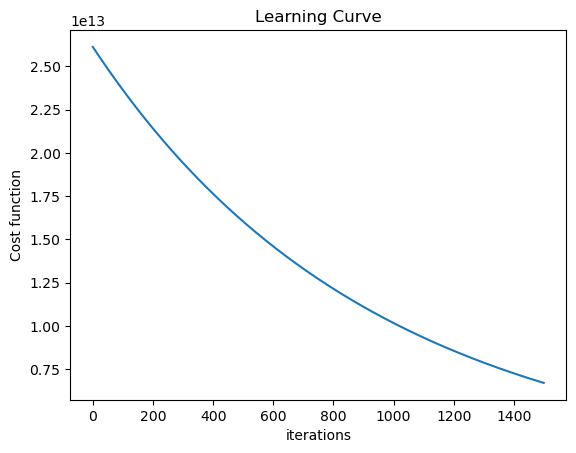

In [14]:
print(learningCurve.shape)
plt.plot(np.arange(1500), learningCurve)

plt.title("Learning Curve")
plt.ylabel("Cost function")
plt.xlabel("iterations")
plt.show()

Training a Neural Network to Predict Housing Prices

In [15]:
def sigmoid(z):
    z = np.clip( z, -500, 500 ) # to prevent overflow
    return 1 / (1 + np.exp(-z.astype(float)))

In [16]:
class NeuralNetwork:
    """a neural network containing a list of layers
    """
    
    def __init__(self, structure, alpha):
        self.structure = structure
        self.alpha = alpha
        self.Bn = [np.zeros((l, 1)) for l in structure[1:]] # list of all bias vectors in hidden layers
        
        self.Wn = [np.zeros((l, next_l)) for l, next_l in zip(structure[:-1], structure[1:])] # list of all weight matrices in hidden layers
        
    
    def forwardProp(self, x):
        """forward propogation algorithm, it takes the input data as a vector
        and repeatedly uses matrix vector multiplication and sigmoid activation
        until the output layer is reached
        """
        
        
        x_reshape = np.reshape(x, (x.shape[0], 1))
        An = []
        Zn = []
        
        for b, W in zip(self.Bn, self.Wn):
            if len(Zn) == 0:
                z = np.transpose(W) @ x_reshape + b
            else:
                z = np.transpose(W) @ a + b
                
            a = z    
            if W is not self.Wn[-1]: # this works rn
                a = sigmoid(z)
                
            Zn.append(z)
            An.append(a)
        print('----------------------------------------')
        return An[-1]
    
    def backProp(self, x, y):
        dJ_dBn = [np.zeros(b.shape) for b in self.Bn] # same shape as Bn 
        dJ_dWn = [np.zeros(W.shape) for W in self.Wn] # same shape as Wn
        
        Zn = [] # raw output
        An = [] # output after function applied
        
        x_reshape = np.reshape(x, (x.shape[0], 1))
        
        #calculating activations and raw outputs for later gradient calculations
        for b, W in zip(self.Bn, self.Wn):
            if len(Zn) == 0:
                z = np.transpose(W) @ x_reshape + b
            else:
                z = np.transpose(W) @ a + b

            a = z    
            if W is not self.Wn[-1]:
                a = sigmoid(z)

            Zn.append(z)
            An.append(a)

        # iteratively applying chain rule
        for L in range (len(self.structure) - 2, -1, -1):
            if L == len(self.structure) - 2:
                delta = 2 * (An[L] - y)  # since last layer is linear
            else:
                delta = Zn[L] * (1 - Zn[L]) * (self.Wn[L+1] @ delta) # da_dz * dz_dw * dJ_da = dJ_dw
            
            dJ_dBn[L] = delta
            if L == 0:
                dJ_dWn[L] = x_reshape @ np.transpose(delta)
            else:
                dJ_dWn[L] = An[L - 1] @ np.transpose(delta)
        # print(dJ_dBn)
        return dJ_dBn, dJ_dWn
    
    def gradient_descent(self, X, y):
        
        avg_dJ_dBn= [np.zeros(b.shape) for b in self.Bn]
        avg_dJ_dWn = [np.zeros(W.shape) for W in self.Wn]
        
        for m in range(len(X)):
            dJ_dBn, dJ_dWn = self.backProp(X[m], y[m])

            avg_dJ_dBn = [avg_dJ_dBn[i] + dJ_dBn[i] for i in range(len(dJ_dBn))]
            
            avg_dJ_dWn = [avg_dJ_dWn[i] + dJ_dWn[i] for i in range(len(dJ_dWn))]
        
        avg_dJ_dBn = [avg_dJ_dBn[i] / len(X) for i in range(len(avg_dJ_dBn))]
        avg_dJ_dWn = [avg_dJ_dWn[i] / len(X) for i in range(len(avg_dJ_dWn))]
        
        self.Bn = [self.Bn[i] - self.alpha * avg_dJ_dBn[i] for i in range(len(avg_dJ_dBn))]
        self.Wn = [self.Wn[i] - self.alpha * avg_dJ_dWn[i] for i in range(len(avg_dJ_dWn))]
        
        

In [17]:
predictor = NeuralNetwork([6, 30, 8, 1], 0.0018)

# training the neural network
iterations = 500

for itr in range(iterations):
    predictor.gradient_descent(x_train, y_train)

neural_MSE_train = 0
neural_MSE_test = 0

y_pred_train = []
y_pred_test = []

for i in range(x_train.shape[0]):
    y_pred = predictor.forwardProp(x_train[i])
    neural_MSE_train += (y_pred - y_train[i]) ** 2
    y_pred_train.append(y_pred)

for i in range (x_test.shape[0]):
    y_pred = predictor.forwardProp(x_test[i])
    neural_MSE_test += (y_pred - y_test[i]) ** 2
    y_pred_test.append(y_pred)

neural_MSE_train /= x_train.shape[0]
neural_MSE_test /= x_test.shape[0]
    
print('baseline training MSE: ', baseline_training_MSE, 'neural network training MSE: ', neural_MSE_train)
print ('training improvement from baseline model: ',(-neural_MSE_train + baseline_training_MSE)/baseline_training_MSE)

print('baseline test MSE: ', baseline_test_MSE, 'neural network training MSE: ', neural_MSE_test)
print ('test improvement from baseline model: ',(-neural_MSE_test + baseline_test_MSE)/baseline_test_MSE)

----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------

Final comments:

The neural network predictions for housing prices show rougly a 40-50% improvement in the mean squared error from the predictions made by the baseline model, multivariable linear regression.